<a href="https://colab.research.google.com/github/Yujini68/ESAA/blob/main/%EB%AF%B8%EB%8B%881.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train=pd.read_csv("/content/movies_train.csv")
test=pd.read_csv("/content/movies_test.csv")
submission=pd.read_csv("/content/submission.csv")

In [4]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

In [5]:
train['release_time']=pd.to_datetime(train['release_time'])
test['release_time']=pd.to_datetime(test['release_time'])

### 1) 상영시간에 따른 관객수 분포

- 산점도와 히스토그램이 같이 나오는 jointplot 사용



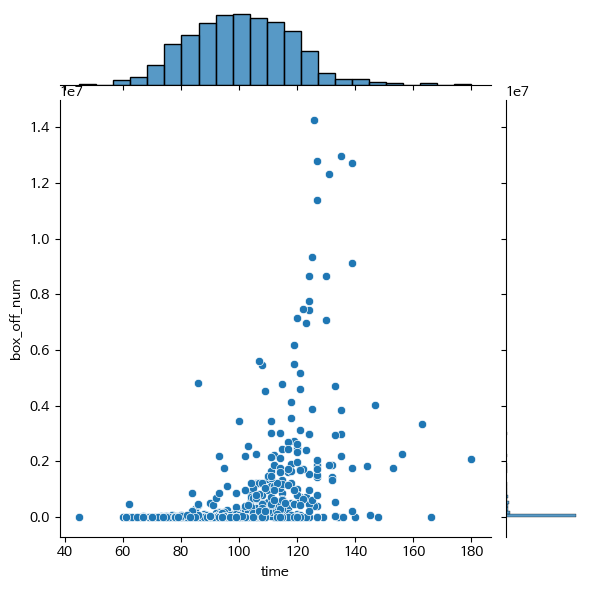

In [6]:
sns.jointplot(x='time',y='box_off_num',data=train)
plt.show()

- regplot을 이용하여 산점도와 회귀선 확인

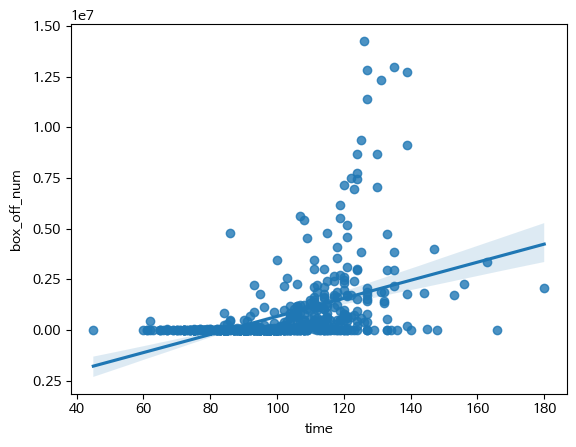

In [7]:
sns.regplot(x='time',y='box_off_num',data=train)
plt.show()

### 2) 장르에 따른 관객수 분포

- 장르에 따른 관객수 계산

In [8]:
train.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)

genre
드라마       138277444
코미디        63277442
액션         61711274
느와르        61119768
멜로/로맨스     33225507
공포         24814966
SF         23248494
미스터리        8968319
다큐멘터리       6247020
애니메이션       3820460
서스펜스         165222
뮤지컬           33135
Name: box_off_num, dtype: int64

- pie 차트를 이용하여 한눈에 보기

Text(0.5, 1.0, '영화 장르 별 관객 비율')

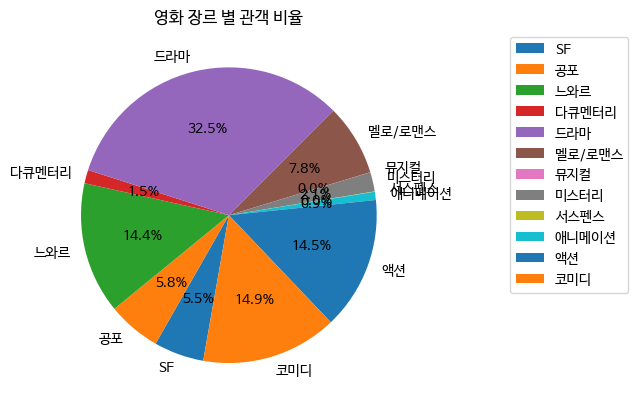

In [10]:
train.groupby(['genre']).sum().plot(kind='pie', y='box_off_num', autopct='%.1f%%', startangle=260, counterclock=False,)
plt.legend(bbox_to_anchor=(1.6,1))
plt.ylabel('')
plt.title('영화 장르 별 관객 비율')

### 3) 상영 등급에 따른 평균 관객수 분포

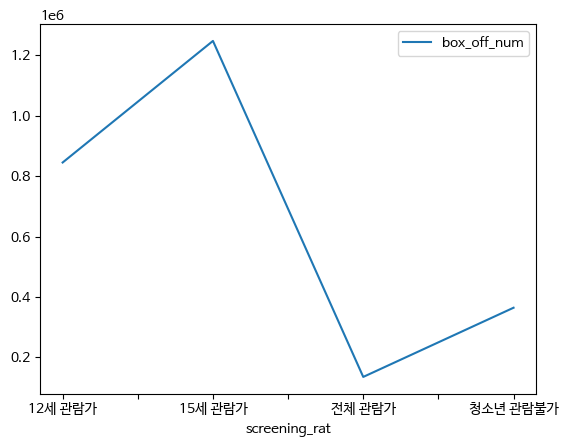

In [11]:
a = train[['screening_rat','box_off_num']].groupby('screening_rat').mean()
a.plot()
plt.show()

15세 관람가 > 12세 관람가 > 청소년 관람불가 > 전체 관람가

- 상영 등급 별 데이터 수 확인

In [17]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64